## Logistic Regression with L2 regularization for Sentiment Analysis on Amazon Product Reviews

 
### Fire up GraphLab Create

In [1]:
from __future__ import division
import graphlab

### Load the product review data

In [2]:
products = graphlab.SFrame('amazon_baby_subset.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to agrawal.pr@husky.neu.edu and will expire on March 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\agraw\AppData\Local\Temp\graphlab_server_1505322739.log.0


We will work with a hand-curated list of important words extracted from the review data. We will also perform 2 simple data transformations:

1. Remove punctuation
2. Compute word counts (only for the **important_words**)

In [3]:
import json
with open('important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation) 

# Remove punctuation.
products['review_clean'] = products['review'].apply(remove_punctuation)

# Split out the words into individual columns
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

Now, let us take a look at what the dataset looks like:

In [4]:
products

name,review,rating,sentiment,review_clean,baby
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1,All of my kids have criednonstop when I tried to ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1,We wanted to getsomething to keep track ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1,My daughter had her 1stbaby over a year ago She ...,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1,One of babys first andfavorite books and it is ...,0
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1,Very cute interactivebook My son loves this ...,0
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1,Beautiful book I love itto record cherished t ...,0
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1,Try this out for a springproject Easy fun and ...,0
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1,very nice Divine MercyPendant of Jesus now on ...,0
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1,We bought the pins as my6 year old Autistic son ...,0
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1,It has been many yearssince we needed diaper ...,0


### Splitting the data into Train and Validation

We split the data into a train-validation split with 80% of the data in the training set and 20% of the data in the validation set.

In [5]:
train_data, validation_data = products.random_split(.8, seed=2)

print 'Training set   : %d data points' % len(train_data)
print 'Validation set : %d data points' % len(validation_data)

Training set   : 42361 data points
Validation set : 10711 data points


### Convert SFrame to NumPy array

A function that extracts columns from an SFrame and converts them into a NumPy array. Two arrays are returned: one representing features and another representing class labels. 

**Note:** The feature matrix includes an additional column 'intercept' filled with 1's to take account of the intercept term.

In [6]:
import numpy as np

def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

We convert both the training and validation sets into NumPy arrays.

**Warning**: This may take a few minutes.

In [7]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

## Building on logistic regression with no L2 penalty assignment

Link function for logistic regression can be defined as:

$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))},
$$

where the feature vector $h(\mathbf{x}_i)$ is given by the word counts of **important_words** in the review $\mathbf{x}_i$. 

We will use following code to make probability predictions since this part is not affected by the L2 penalty.  (Only the way in which the coefficients are learned is affected by the addition of a regularization term.)

In [13]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1 / (1 + np.exp(-score))
    
    return predictions

## Adding  L2 penalty

Let us now work on extending logistic regression with L2 regularization. The L2 regularization is particularly useful in preventing overfitting.

For logistic regression without an L2 penalty, the derivative of the log likelihood function is:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

** Adding L2 penalty to the derivative** 

It takes only a small modification to add a L2 penalty. All terms indicated in **red** refer to terms that were added due to an **L2 penalty**.

* The link function is still the sigmoid:
$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))},
$$
* We add the L2 penalty term to the per-coefficient derivative of log likelihood:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$$

The **per-coefficient derivative for logistic regression with an L2 penalty** is as follows:
$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$$
and for the intercept term, we have
$$
\frac{\partial\ell}{\partial w_0} = \sum_{i=1}^N h_0(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

**Note**: We do not apply the L2 penalty on the intercept. A large intercept does not necessarily indicate overfitting because the intercept is not associated with any particular feature.

Write a function that computes the derivative of log likelihood with respect to a single coefficient $w_j$. Unlike its counterpart in the last assignment, the function accepts five arguments:
 * `errors` vector containing $(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w}))$ for all $i$
 * `feature` vector containing $h_j(\mathbf{x}_i)$  for all $i$
 * `coefficient` containing the current value of coefficient $w_j$.
 * `l2_penalty` representing the L2 penalty constant $\lambda$
 * `feature_is_constant` telling whether the $j$-th feature is constant or not.

In [9]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    derivative = np.dot(errors, feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant:
        derivative = derivative - (2 * l2_penalty * coefficient)
                
    return derivative

To verify the correctness of the gradient ascent algorithm, we provide a function for computing log likelihood used for more numerical stability:

$$\ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) \color{red}{-\lambda\|\mathbf{w}\|_2^2} $$

In [10]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

Function for logistic regression with L2 penalty.

In [11]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in xrange(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        predictions = predict_probability(feature_matrix, initial_coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] = coefficients[j] + (step_size * derivative)
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print 'iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp)
    return coefficients

## Explore effects of L2 regularization

Now that we have written up all the pieces needed for regularized logistic regression, let's explore the benefits of using **L2 regularization** in analyzing sentiment for product reviews. **As iterations pass, the log likelihood should increase**.

Below, we train models with increasing amounts of regularization, starting with no L2 penalty.

In [14]:
# run with L2 = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=0, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29000.25452723
iteration   2: log likelihood of observed labels = -28824.98326093
iteration   3: log likelihood of observed labels = -28653.55554714
iteration   4: log likelihood of observed labels = -28485.94249840
iteration   5: log likelihood of observed labels = -28322.10968836
iteration   6: log likelihood of observed labels = -28162.01829095
iteration   7: log likelihood of observed labels = -28005.62599168
iteration   8: log likelihood of observed labels = -27852.88769516
iteration   9: log likelihood of observed labels = -27703.75607932
iteration  10: log likelihood of observed labels = -27558.18204276
iteration  11: log likelihood of observed labels = -27416.11507793
iteration  12: log likelihood of observed labels = -27277.50359029
iteration  13: log likelihood of observed labels = -27142.29517521
iteration  14: log likelihood of observed labels = -27010.4368

In [15]:
# run with L2 = 4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=4, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29000.27640736
iteration   2: log likelihood of observed labels = -28825.03733928
iteration   3: log likelihood of observed labels = -28653.65538089
iteration   4: log likelihood of observed labels = -28486.10119379
iteration   5: log likelihood of observed labels = -28322.33991114
iteration   6: log likelihood of observed labels = -28162.33227795
iteration   7: log likelihood of observed labels = -28006.03556319
iteration   8: log likelihood of observed labels = -27853.40426789
iteration   9: log likelihood of observed labels = -27704.39067964
iteration  10: log likelihood of observed labels = -27558.94532021
iteration  11: log likelihood of observed labels = -27417.01731873
iteration  12: log likelihood of observed labels = -27278.55473086
iteration  13: log likelihood of observed labels = -27143.50481553
iteration  14: log likelihood of observed labels = -27011.8142

In [16]:
# run with L2 = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=10, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29000.30922535
iteration   2: log likelihood of observed labels = -28825.11844588
iteration   3: log likelihood of observed labels = -28653.80510123
iteration   4: log likelihood of observed labels = -28486.33917263
iteration   5: log likelihood of observed labels = -28322.68512861
iteration   6: log likelihood of observed labels = -28162.80306714
iteration   7: log likelihood of observed labels = -28006.64962883
iteration   8: log likelihood of observed labels = -27854.17870586
iteration   9: log likelihood of observed labels = -27705.34199701
iteration  10: log likelihood of observed labels = -27560.08945554
iteration  11: log likelihood of observed labels = -27418.36966250
iteration  12: log likelihood of observed labels = -27280.13014581
iteration  13: log likelihood of observed labels = -27145.31765675
iteration  14: log likelihood of observed labels = -27013.8784

In [17]:
# run with L2 = 1e2
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e2, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29000.80117734
iteration   2: log likelihood of observed labels = -28826.33347355
iteration   3: log likelihood of observed labels = -28656.04655218
iteration   4: log likelihood of observed labels = -28489.89961846
iteration   5: log likelihood of observed labels = -28327.84662415
iteration   6: log likelihood of observed labels = -28169.83743447
iteration   7: log likelihood of observed labels = -28015.81875776
iteration   8: log likelihood of observed labels = -27865.73486507
iteration   9: log likelihood of observed labels = -27719.52815180
iteration  10: log likelihood of observed labels = -27577.13958862
iteration  11: log likelihood of observed labels = -27438.50909491
iteration  12: log likelihood of observed labels = -27303.57585558
iteration  13: log likelihood of observed labels = -27172.27859324
iteration  14: log likelihood of observed labels = -27044.5558

In [18]:
# run with L2 = 1e3
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e3, max_iter=501)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29005.68800682
iteration   2: log likelihood of observed labels = -28838.32292134
iteration   3: log likelihood of observed labels = -28678.01762958
iteration   4: log likelihood of observed labels = -28524.56813270
iteration   5: log likelihood of observed labels = -28377.77115832
iteration   6: log likelihood of observed labels = -28237.42538780
iteration   7: log likelihood of observed labels = -28103.33236183
iteration   8: log likelihood of observed labels = -27975.29712260
iteration   9: log likelihood of observed labels = -27853.12866186
iteration  10: log likelihood of observed labels = -27736.64023115
iteration  11: log likelihood of observed labels = -27625.64955423
iteration  12: log likelihood of observed labels = -27519.97896753
iteration  13: log likelihood of observed labels = -27419.45550596
iteration  14: log likelihood of observed labels = -27323.9109

In [19]:
# run with L2 = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e5, max_iter=501)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.82118713
iteration   2: log likelihood of observed labels = -29271.78399382
iteration   3: log likelihood of observed labels = -29271.74797122
iteration   4: log likelihood of observed labels = -29271.71311934
iteration   5: log likelihood of observed labels = -29271.67943817
iteration   6: log likelihood of observed labels = -29271.64692771
iteration   7: log likelihood of observed labels = -29271.61558797
iteration   8: log likelihood of observed labels = -29271.58541895
iteration   9: log likelihood of observed labels = -29271.55642064
iteration  10: log likelihood of observed labels = -29271.52859305
iteration  11: log likelihood of observed labels = -29271.50193618
iteration  12: log likelihood of observed labels = -29271.47645002
iteration  13: log likelihood of observed labels = -29271.45213459
iteration  14: log likelihood of observed labels = -29271.4289

## Compare coefficients

We now compare the **coefficients** for each of the models that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

A helper function that will help us create this table.

In [22]:
table = graphlab.SFrame({'word': ['(intercept)'] + important_words})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table
print table

+-------------+
|     word    |
+-------------+
| (intercept) |
|     baby    |
|     one     |
|    great    |
|     love    |
|     use     |
|    would    |
|     like    |
|     easy    |
|    little   |
+-------------+
[194 rows x 1 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


Now, let's run the function `add_coefficients_to_table` for each of the L2 penalty strengths.

In [23]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_4_penalty, 'coefficients [L2=4]')
add_coefficients_to_table(coefficients_10_penalty, 'coefficients [L2=10]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e3_penalty, 'coefficients [L2=1e3]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

word,coefficients [L2=0],coefficients [L2=4],coefficients [L2=10],coefficients [L2=1e2]
(intercept),0.1665825,0.1665825,0.1665825,0.1665825
baby,0.929355,0.920122976378,0.906502817833,0.731291890225
one,-0.944385,-0.935003671413,-0.921163240763,-0.743118713248
great,4.5778875,4.53241169631,4.46532048407,3.60225317894
love,4.61922,4.57333360766,4.50563664713,3.63477694225
use,0.227955,0.225690541376,0.22234974777,0.179373482508
would,-4.190865,-4.14923379914,-4.08781459362,-3.29771248611
like,-0.418335,-0.414179345162,-0.408048438216,-0.32917990746
easy,4.491465,4.44684769985,4.38102305222,3.53424894656
little,3.03606,3.00590039722,2.96140543184,2.38901825055


Using **the coefficients trained with L2 penalty 0**, the 5 most positive words (with largest positive coefficients) and the 5 most negative words (with largest negative coefficients) are:

In [54]:
word_coefficient_tuple = [(word, coefficient) for word, coefficient in zip(important_words, table['coefficients [L2=0]'])]
word_coefficient_tuple_sorted = sorted(word_coefficient_tuple, key=lambda x : x[1], reverse=True)
positive_words = [i[0] for i in word_coefficient_tuple_sorted][0:5]
negative_words = [i[0] for i in word_coefficient_tuple_sorted][-5:]
print "Top 5 positive words by using L2 = 0 penalty for our logistic regression model"
print positive_words
print
print "Top 5 negative words by using L2 = 0 penalty for our logistic regression model"
print negative_words

Top 5 positive words by using L2 = 0 penalty for our logistic regression model
['use', 'love', 'little', 'stroller', 'seat']

Top 5 negative words by using L2 = 0 penalty for our logistic regression model
['also', 'purchased', 'monitor', 'good', 'like']


Let us observe the effect of increasing L2 penalty on the 10 words just selected by plotting the coefficient path.

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in xrange(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in xrange(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

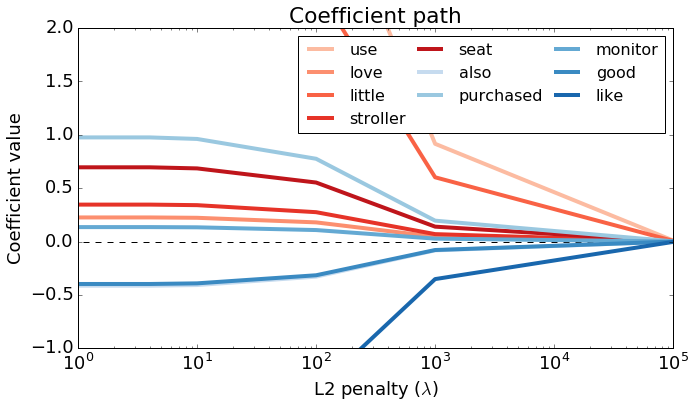

In [56]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

## Measuring accuracy

Now, let us compute the accuracy of the classifier model.

$$
\mbox{accuracy} = \frac{\mbox{# correctly classified data points}}{\mbox{# total data points}}
$$


The class prediction is calculated using
$$
\hat{y}_i = 
\left\{
\begin{array}{ll}
      +1 & h(\mathbf{x}_i)^T\mathbf{w} > 0 \\
      -1 & h(\mathbf{x}_i)^T\mathbf{w} \leq 0 \\
\end{array} 
\right.
$$

**Note**: It is important to know that the model prediction code doesn't change even with the addition of an L2 penalty. The only thing that changes is the estimated coefficients used in this prediction.

In [57]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

Below, we compare the accuracy on the **training data** and **validation data** for all the models that were trained. We first calculate the accuracy values and then build a simple report summarizing the performance for the various models.

In [58]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10]  = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10]  = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [59]:
# Build a simple report
for key in sorted(validation_accuracy.keys()):
    print "L2 penalty = %g" % key
    print "train accuracy = %s, validation_accuracy = %s" % (train_accuracy[key], validation_accuracy[key])
    print "--------------------------------------------------------------------------------"

L2 penalty = 0
train accuracy = 0.742900309247, validation_accuracy = 0.741480720754
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.742876702627, validation_accuracy = 0.74138735879
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.742923915866, validation_accuracy = 0.741293996826
--------------------------------------------------------------------------------
L2 penalty = 100
train accuracy = 0.743537687968, validation_accuracy = 0.74204089254
--------------------------------------------------------------------------------
L2 penalty = 1000
train accuracy = 0.744222279927, validation_accuracy = 0.743721407898
--------------------------------------------------------------------------------
L2 penalty = 100000
train accuracy = 0.50168787328, validation_accuracy = 0.497899355802
-----------------------------------------------------------------------------